In [1]:
import h2o
from h2o.estimators.aggregator import H2OAggregatorEstimator
import matplotlib.pyplot as plt

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
h2o.init()
#df = h2o.import_file("../input/real-quad-fields-1-2/real_quad_fields_1_2.csv")
df = h2o.import_file("C:/Temp/real_quad_fields_1_2.csv")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,15 hours 36 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_esultano_pbvvpu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.122 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
print(df['class_number'].table())

class_number,Count
1,177159
2,183432


In [4]:
# Build an aggregated frame with around 5000 records
agg_frame = H2OAggregatorEstimator(target_num_exemplars = 5000)
agg_frame.train(training_frame=df)
# Use the aggregated model to create a new dataframe using aggregated_frame
small_df = agg_frame.aggregated_frame
small_df_pd = small_df.as_data_frame(use_pandas = True)

C:\Development\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:201: RuntimeWarning:

Dropping bad and constant columns: [defining_polynomial, number_roots_unity, a_1]



aggregator Model Build progress: |█████████████████Job request failed Unexpected HTTP error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), will retry after 3s.
███████████████████████| 100%


In [3]:
# plot_df_pd = small_df_pd
plot_df_pd = df.as_data_frame(use_pandas = True)

feature1 = 'a_900' #'a_2'
feature2 = 'a_180' #'a_3'
feature3 = 'a_490' #'a_5'
cnt_series = plot_df_pd[['class_number', feature1, feature2, feature3]].groupby(['class_number', feature1, feature2, feature3]).size()
cnt_df = cnt_series.to_frame(name = 'cnt').reset_index()

In [4]:
colors = cnt_df['class_number']
color_map = {1:'red', 2:'green'}

fig = go.Figure(
    data=[go.Scatter3d(
    x=cnt_df.loc[:, feature1].array,
    y=cnt_df.loc[:, feature2].array,
    z=cnt_df.loc[:, feature3].array,
    mode='markers',
    opacity=0.7,
    marker=dict(
        size=cnt_df.cnt.array,
        sizemode='area',
        sizeref=2.*max(cnt_df.cnt.array)/(60.**2),
        sizemin=4,
        color=cnt_df.class_number.map(color_map),
        line=dict(color='white', width=0)
    ))]
)
fig.update_layout(
    title=feature1 + ', ' + feature2 + ' and ' + feature3,
    scene = dict(
        xaxis=dict(
            title=feature1,
            gridcolor='white'
        ),
        yaxis=dict(
            title=feature2,
            gridcolor='white'
        ),
        zaxis=dict(
            title=feature3,
            gridcolor='white'
        ),       
        bgcolor = 'white'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
)
fig.write_html("C:/Temp/class_number_coeffs.html")
fig.show()

In [8]:
plot_df_pd = small_df_pd

Text(0, 0.5, 'zeta_180')

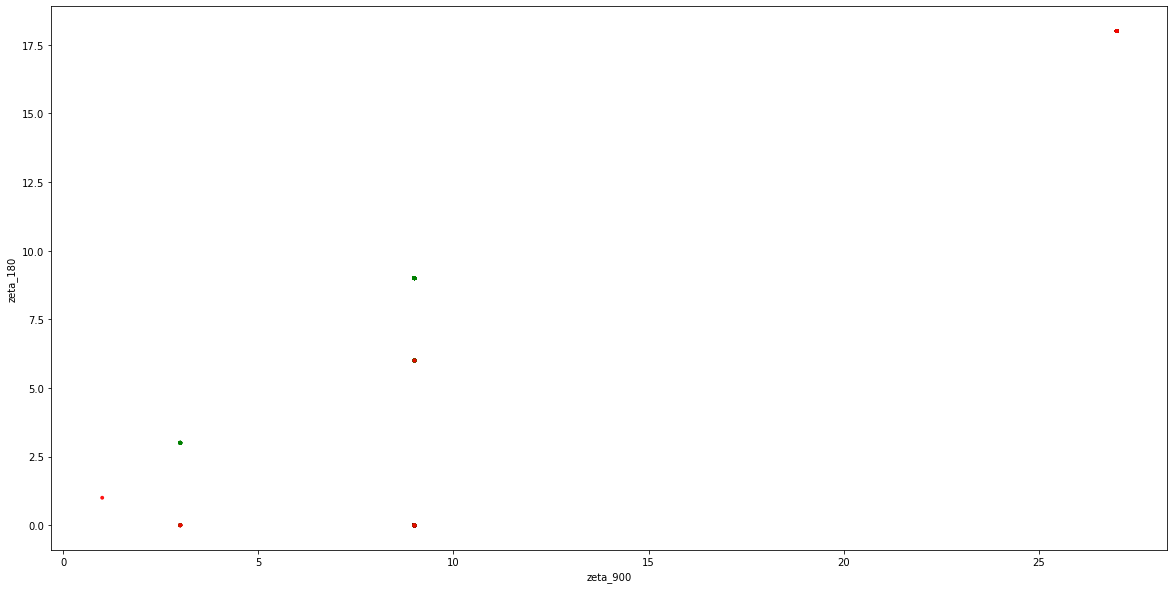

In [9]:
colors = plot_df_pd['class_number']
color_map = {1:'red', 2:'green'}
plt.figure(figsize=(20,10))
plt.scatter(plot_df_pd.a_900, plot_df_pd.a_180, s=8, alpha=0.9, c=plot_df_pd.class_number.map(color_map))
plt.xlabel("zeta_900")
plt.ylabel("zeta_180")

In [10]:
feature1 = 'res_s=0'
feature2 = 'regulator'
feature3 = 'discriminant'

dr1 = go.Scatter3d(
    x=plot_df_pd[plot_df_pd['class_number'] == 1][feature1],
    y=plot_df_pd[plot_df_pd['class_number'] == 1][feature2],
    z=plot_df_pd[plot_df_pd['class_number'] == 1][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=1)),
    name ='class_number_1'
)
dr2 = go.Scatter3d(
    x=plot_df_pd[plot_df_pd['class_number'] == 2][feature1],
    y=plot_df_pd[plot_df_pd['class_number'] == 2][feature2],
    z=plot_df_pd[plot_df_pd['class_number'] == 2][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,255,0)',
                  line=dict(width=1)),
    name ='class_number_2'
)
data = [dr1, dr2]
layout = go.Layout(
    title='class_number',
    scene = dict(
        xaxis = dict(title=feature1),
        yaxis = dict(title=feature2),
        zaxis = dict(title=feature3),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='class_number')